Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

Loading Main Dataset

In [3]:
df = pd.read_csv(r'C:\Users\pc\Documents\MACHINE LEARNING\Codveda-Internship\Random Forest\datasets\churn-bigml-20.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [5]:
df.isna().sum().sum()

np.int64(0)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge'], axis=1, inplace=True)

In [8]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,203.355322,100.476762,199.685307,100.113943,10.238381,4.527736,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,49.719268,18.948262,49.759931,20.172505,2.807850,2.482442,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,48.100000,37.000000,23.200000,42.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,171.050000,88.000000,167.950000,86.000000,8.600000,3.000000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,203.700000,101.000000,201.600000,100.000000,10.500000,4.000000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,236.450000,113.000000,231.500000,113.500000,12.050000,6.000000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,361.800000,168.000000,367.700000,175.000000,18.300000,18.000000,8.000000


Exploratory Data Analysis

Numerical Variable Distribution

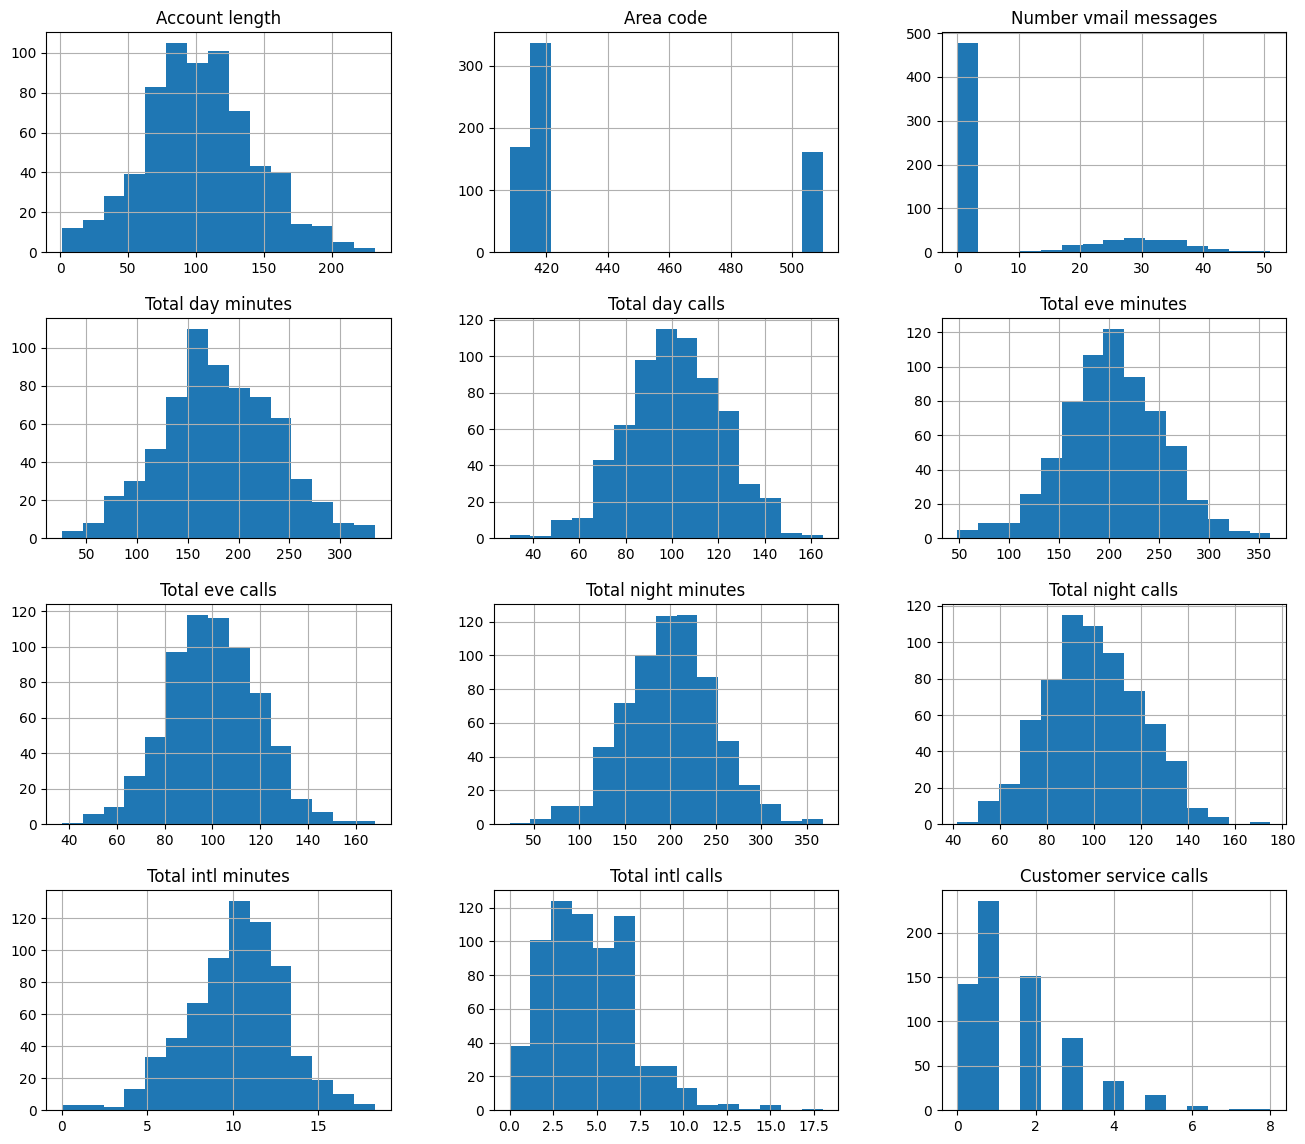

In [9]:
df_num = df._get_numeric_data().drop('Churn', axis=1)
df_num.hist(bins=15, figsize=(16,14))
plt.show()

Categorical Variable Distribution

In [10]:
df.select_dtypes(include=['object']).columns

Index(['State', 'International plan', 'Voice mail plan'], dtype='object')

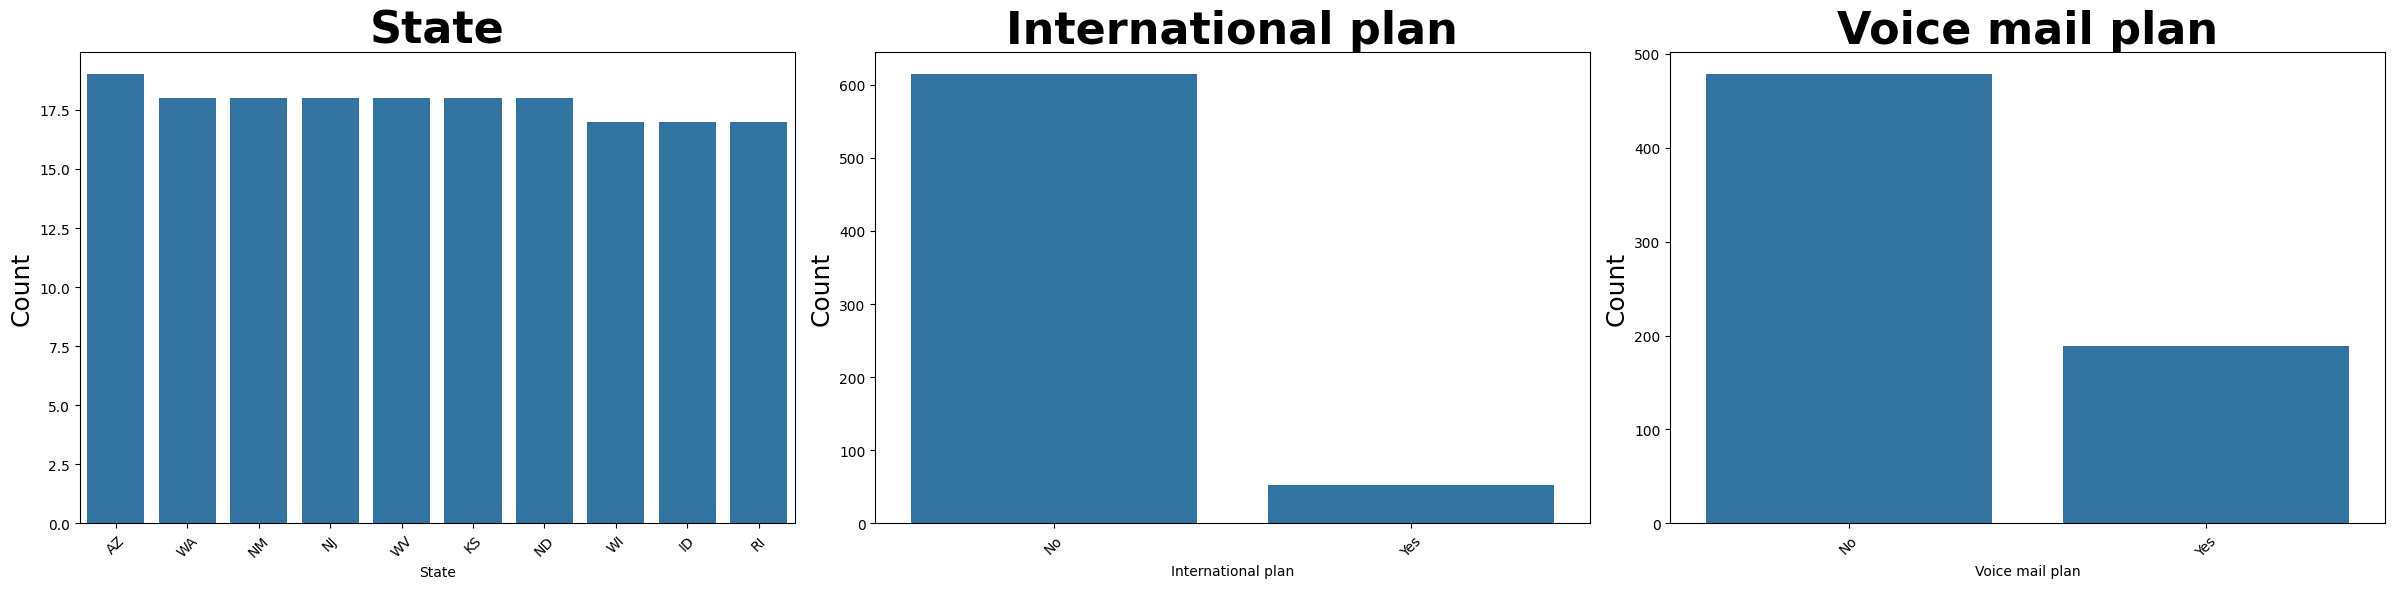

In [11]:
df_cat = ['State', 'International plan', 'Voice mail plan']
n_cols = 4
n_rows = (len(df_cat) + n_cols - 1) // n_cols

fig = plt.figure(figsize=(8*n_cols, 6*n_rows))

for i, col in enumerate(df_cat):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10], ax=ax)
    ax.set_title(col, fontsize=32, fontweight='bold')
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.set_ylabel('Count', fontsize=18)

plt.tight_layout()
plt.show()

Target Variable Distribution

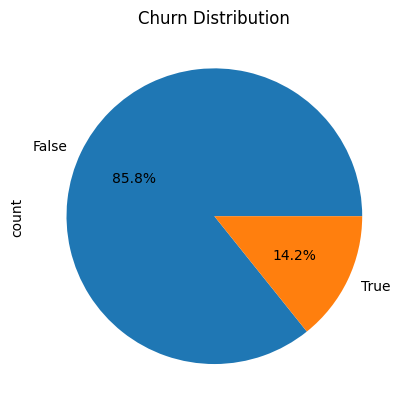

In [12]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show()

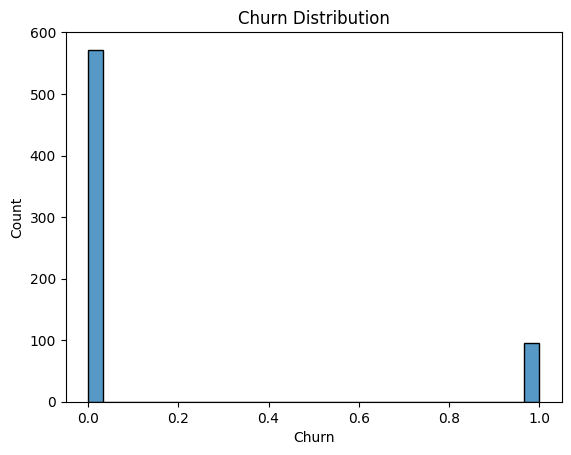

In [13]:
sns.histplot(df['Churn'], bins=30)
plt.title('Churn Distribution')
plt.show()


Feature Correlation for main dataset

In [14]:
df_num = df._get_numeric_data()

df_corr = df_num.corr()['Churn'].drop('Churn')

df_corr

Account length            0.012315
Area code                 0.027129
Number vmail messages    -0.102381
Total day minutes         0.242781
Total day calls           0.019360
Total eve minutes         0.175614
Total eve calls           0.055669
Total night minutes       0.042930
Total night calls        -0.017626
Total intl minutes       -0.003740
Total intl calls          0.015331
Customer service calls    0.233259
Name: Churn, dtype: float64

In [15]:
df_num.corr()['Churn'].drop('Churn').abs().sort_values(ascending=False)


Total day minutes         0.242781
Customer service calls    0.233259
Total eve minutes         0.175614
Number vmail messages     0.102381
Total eve calls           0.055669
Total night minutes       0.042930
Area code                 0.027129
Total day calls           0.019360
Total night calls         0.017626
Total intl calls          0.015331
Account length            0.012315
Total intl minutes        0.003740
Name: Churn, dtype: float64

In [16]:
df_num.columns

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total eve minutes',
       'Total eve calls', 'Total night minutes', 'Total night calls',
       'Total intl minutes', 'Total intl calls', 'Customer service calls',
       'Churn'],
      dtype='object')

In [17]:
df_corr = df_num[['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total eve minutes',
       'Total eve calls', 'Total night minutes', 'Total night calls',
       'Total intl minutes', 'Total intl calls', 'Customer service calls']]

df_corr = df_corr.corr()

Feature Correlation Heatmap

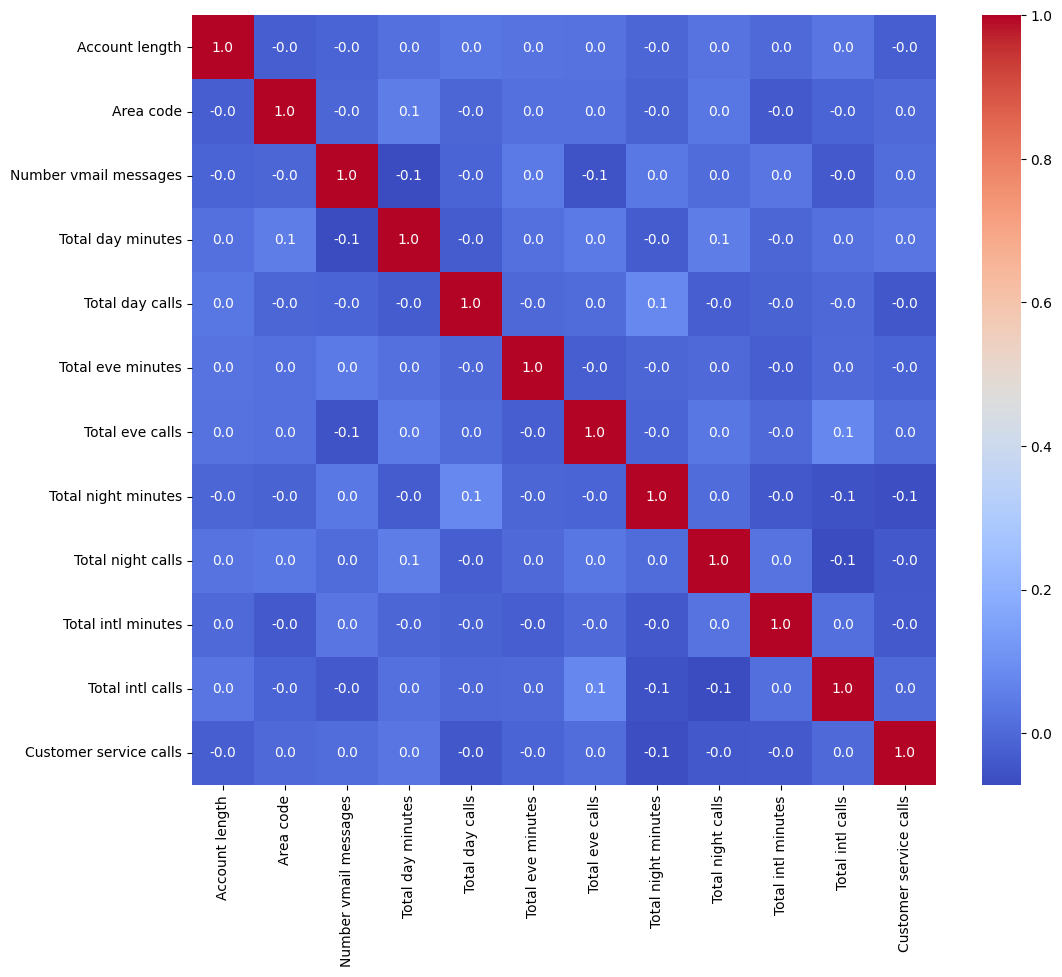

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df_corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

Data Splitting

In [19]:
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Churn'])

In [20]:
train.shape

(533, 16)

In [21]:
test.shape

(134, 16)

Preprocessing

In [22]:
train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
551,NM,178,415,No,Yes,35,175.4,88,190.0,65,138.7,94,10.5,3,2,False
46,FL,106,408,No,Yes,32,165.9,126,216.5,93,173.1,86,14.1,8,4,False
618,IN,104,408,No,No,0,280.4,127,179.4,79,150.6,77,15.2,6,5,False
445,VA,121,415,No,No,0,134.1,112,195.1,104,159.6,139,10.5,2,2,False
305,NJ,127,510,No,No,0,239.8,107,128.9,121,249.9,110,11.3,5,1,False


In [23]:
numerical_features = ['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total eve minutes',
       'Total eve calls', 'Total night minutes', 'Total night calls',
       'Total intl minutes', 'Total intl calls', 'Customer service calls']

categorical_features = ['State', 'International plan', 'Voice mail plan']

In [24]:
preprocessor = ColumnTransformer(transformers=[
    ('scaled', StandardScaler(), (numerical_features)),
    ('encoded', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), (categorical_features))
],
remainder='passthrough')

preprocessor.set_output(transform='pandas')

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('scaled', ...), ('encoded', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_

In [25]:
train_clean = preprocessor.fit_transform(train)
train_clean.head()

,scaled__Account length,scaled__Area code,scaled__Number vmail messages,scaled__Total day minutes,scaled__Total day calls,scaled__Total eve minutes,scaled__Total eve calls,scaled__Total night minutes,scaled__Total night calls,scaled__Total intl minutes,...,encoded__State_VT,encoded__State_WA,encoded__State_WI,encoded__State_WV,encoded__State_WY,encoded__International plan_No,encoded__International plan_Yes,encoded__Voice mail plan_No,encoded__Voice mail plan_Yes,remainder__Churn
551,1.837756,-0.535023,1.983109,-0.104002,-0.629192,-0.254049,-1.902520,-1.194073,-0.276436,0.086097,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,False
46,0.069707,-0.698831,1.763891,-0.273625,1.187956,0.279870,-0.420542,-0.512699,-0.678318,1.349113,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,False
618,0.020594,-0.698831,-0.574437,1.770782,1.235775,-0.467616,-1.161531,-0.958365,-1.130436,1.735035,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
445,0.438050,-0.535023,-0.574437,-0.841417,0.518480,-0.151294,0.161663,-0.780099,1.984154,0.086097,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
305,0.585388,1.688092,-0.574437,1.045866,0.279382,-1.485085,1.061435,1.008508,0.527330,0.366767,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False


In [26]:
train_clean.head()

,scaled__Account length,scaled__Area code,scaled__Number vmail messages,scaled__Total day minutes,scaled__Total day calls,scaled__Total eve minutes,scaled__Total eve calls,scaled__Total night minutes,scaled__Total night calls,scaled__Total intl minutes,...,encoded__State_VT,encoded__State_WA,encoded__State_WI,encoded__State_WV,encoded__State_WY,encoded__International plan_No,encoded__International plan_Yes,encoded__Voice mail plan_No,encoded__Voice mail plan_Yes,remainder__Churn
551,1.837756,-0.535023,1.983109,-0.104002,-0.629192,-0.254049,-1.902520,-1.194073,-0.276436,0.086097,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,False
46,0.069707,-0.698831,1.763891,-0.273625,1.187956,0.279870,-0.420542,-0.512699,-0.678318,1.349113,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,False
618,0.020594,-0.698831,-0.574437,1.770782,1.235775,-0.467616,-1.161531,-0.958365,-1.130436,1.735035,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
445,0.438050,-0.535023,-0.574437,-0.841417,0.518480,-0.151294,0.161663,-0.780099,1.984154,0.086097,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
305,0.585388,1.688092,-0.574437,1.045866,0.279382,-1.485085,1.061435,1.008508,0.527330,0.366767,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False


In [27]:
train_clean.to_csv('train data.csv', index=False)
test.to_csv('test data.csv', index=False)
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']